# Simulación de eventos discretos, Teoría de colas
## Integrantes:
- **José Miguel Zayas Pérez** (tlgrm: @nex25k) _____ C312
- **Adrián Hernández Santos** (tlgrm: @ahdez929) _____ C311

In [2]:
from simulation import simulate_call_center

### Ejemplo
Se realiza una simulación para 5 empleados y se visualizan los resultados obtenidos.

In [3]:
from analysis import *

PARAMETERS = {
    'time': 180, 
    'operators': 5,
    'duration_mean': 6,
    'arrival_mean': 3
}
PARAMETERS_ANALIZE = {
    'time': 180, 
    'operators': PARAMETERS['operators'],
    'operator_costxhour': 24,
    'profitxcall': 210,
    'porcentage_lost_calls': 0.6,
}

sim_result = simulate_call_center(PARAMETERS)

analize = Analizer(sim_result, PARAMETERS_ANALIZE)

print(analize)



        Calls: 68
        Successful calls: 65
        Lost calls: 3
        Average call duration: 6.3080311423059285
        Max call duration: 47.159006830451034
        Min call duration: 2.3426109275927238e-06
        Total time: 172.927561074557
        Lost money: 378.0
        Employees: 5
        Employees cost: 960
        


Se realizan 2000 simulaciones para cada empleado y se va guardando la información de cada una.

In [4]:

simulation_count = 2000

data_w_employees = []
for employees_cant in range(1,8):
    data = []
    for i in range(simulation_count):
        PARAMETERS['operators'] = employees_cant
        PARAMETERS_ANALIZE['operators'] = employees_cant
        simu_result = simulate_call_center(PARAMETERS)
        analize = Analizer(simu_result, PARAMETERS_ANALIZE)
        data.append(analize)
    data_w_employees.append((employees_cant, data))

Se procesan los datos obtenidos anteriormente y se calculan diferentes valores estadísitcos, posteriormente se grafican y se muestran los resultados obtenidos.

El precio de un empleado en 8h es 192

Analisis para 1 empleados

        Llamadas Perdidas
        Media: 39.7605
        Mediana: 40.0
        Varianza: 58.511139750000005
        Desviacion: 7.649257463963415
        Minimo: 13
        Maximo: 65
        


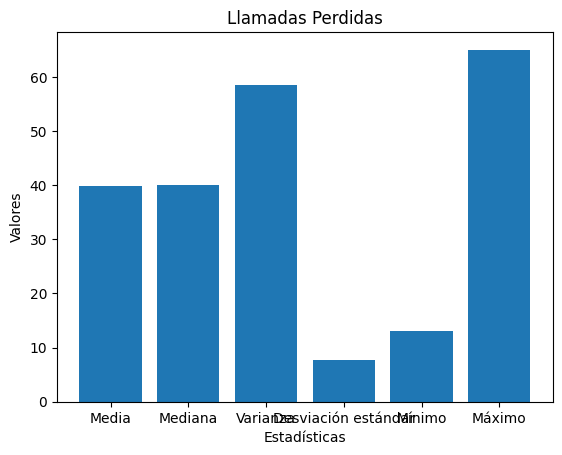

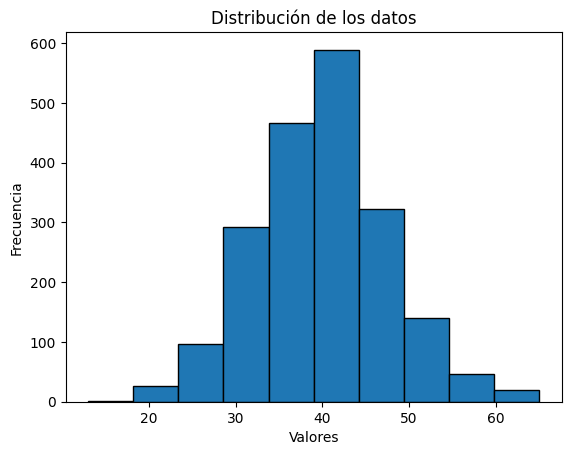


        Dinero Perdido
        Media: 5009.823
        Mediana: 5040.0
        Varianza: 928922.854671
        Desviacion: 963.8064404593902
        Minimo: 1638.0
        Maximo: 8190.0
        


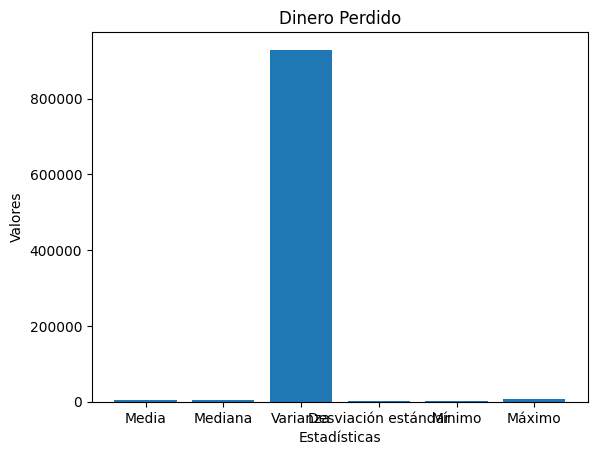

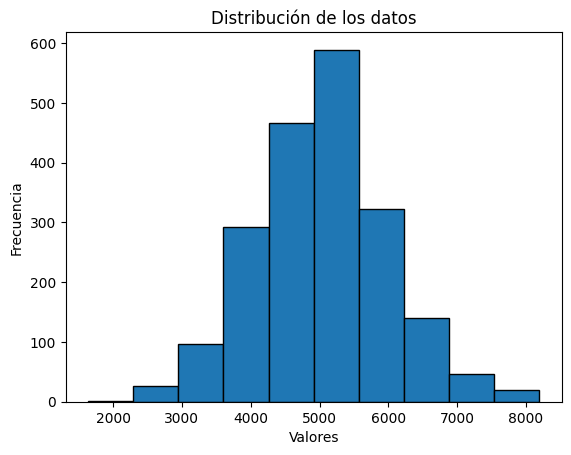

Analisis para 2 empleados

        Llamadas Perdidas
        Media: 23.5845
        Mediana: 23.0
        Varianza: 44.628859750000004
        Desviacion: 6.6804834967238715
        Minimo: 5
        Maximo: 50
        


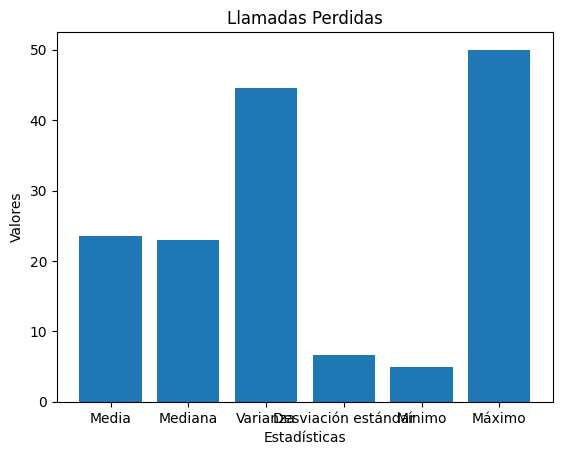

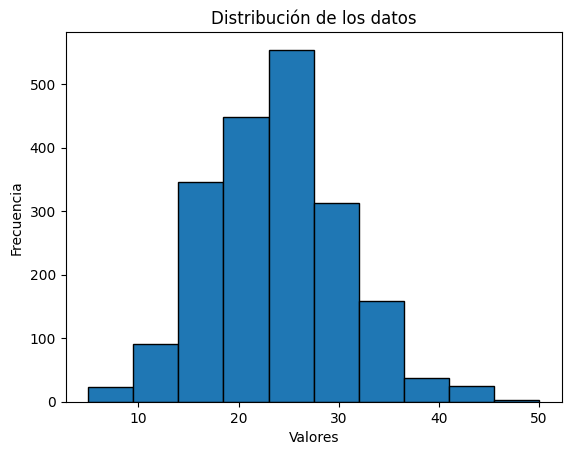


        Dinero Perdido
        Media: 2971.647
        Mediana: 2898.0
        Varianza: 708527.7773910001
        Desviacion: 841.7409205872078
        Minimo: 630.0
        Maximo: 6300.0
        


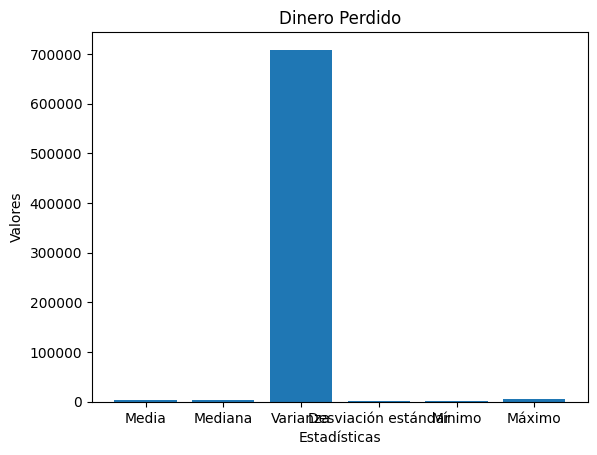

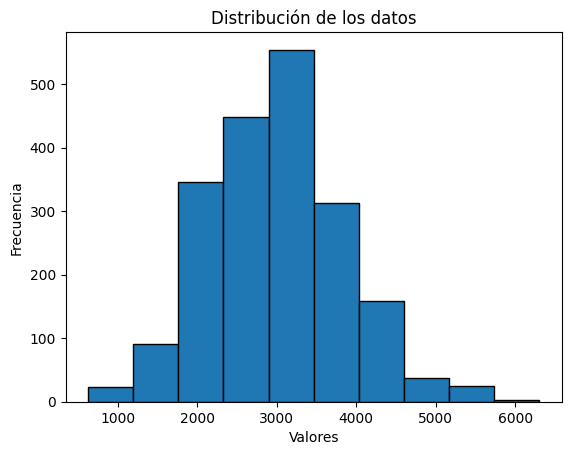

Analisis para 3 empleados

        Llamadas Perdidas
        Media: 12.1785
        Mediana: 12.0
        Varianza: 26.85963775
        Desviacion: 5.182628459575315
        Minimo: 0
        Maximo: 35
        


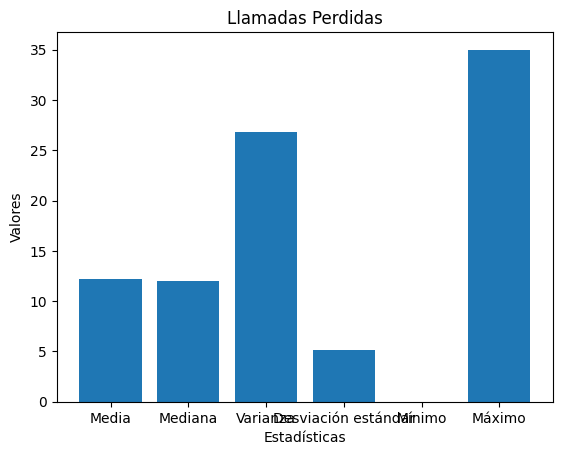

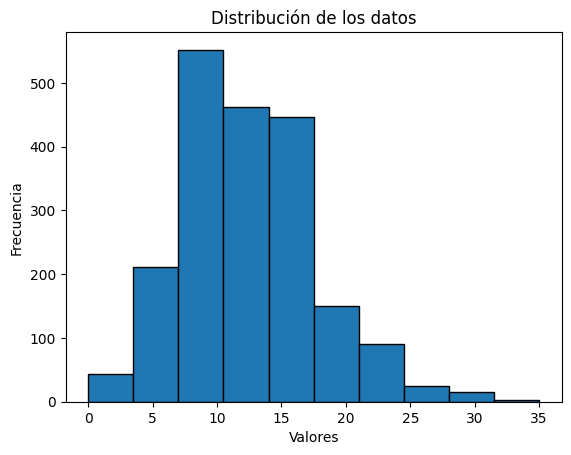


        Dinero Perdido
        Media: 1534.491
        Mediana: 1512.0
        Varianza: 426423.608919
        Desviacion: 653.0111859064897
        Minimo: 0.0
        Maximo: 4410.0
        


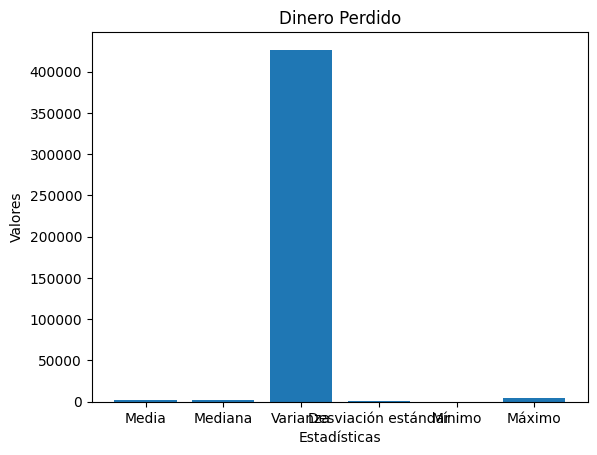

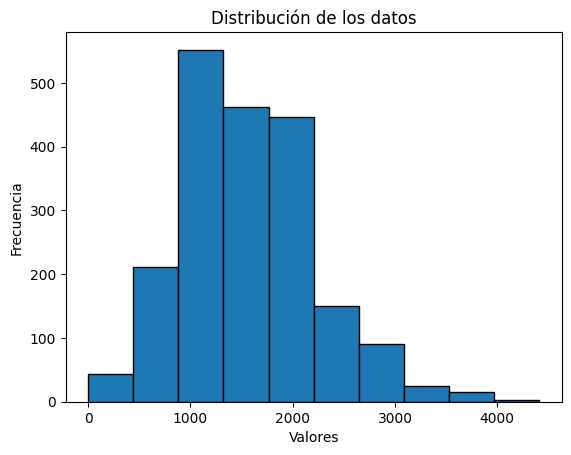

Analisis para 4 empleados

        Llamadas Perdidas
        Media: 5.494
        Mediana: 5.0
        Varianza: 12.702963999999998
        Desviacion: 3.564121771208161
        Minimo: 0
        Maximo: 25
        


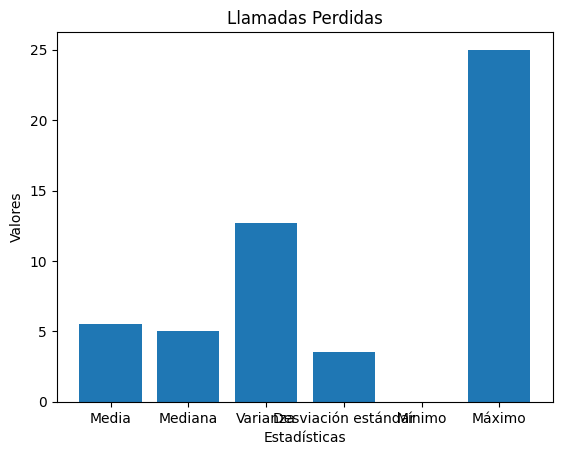

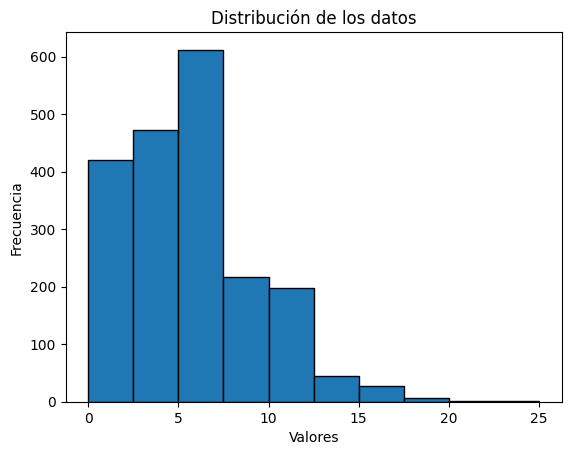


        Dinero Perdido
        Media: 692.244
        Mediana: 630.0
        Varianza: 201672.25646399998
        Desviacion: 449.0793431722283
        Minimo: 0.0
        Maximo: 3150.0
        


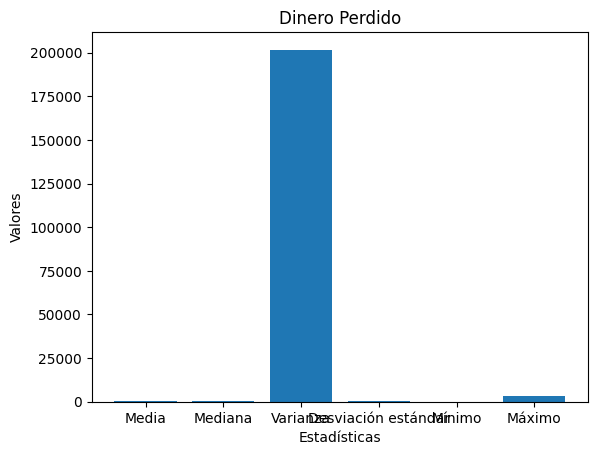

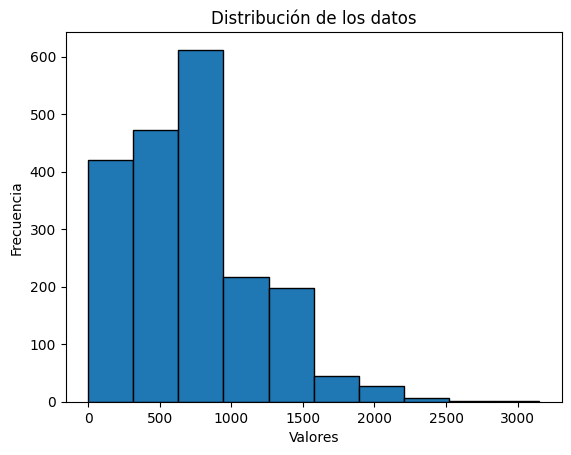

Analisis para 5 empleados

        Llamadas Perdidas
        Media: 2.088
        Mediana: 2.0
        Varianza: 4.662256
        Desviacion: 2.159225787174653
        Minimo: 0
        Maximo: 17
        


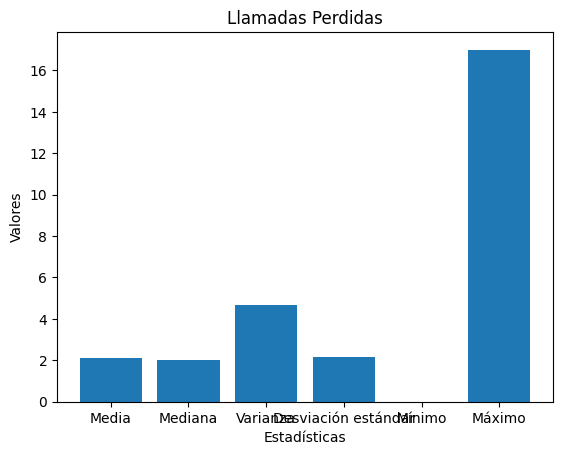

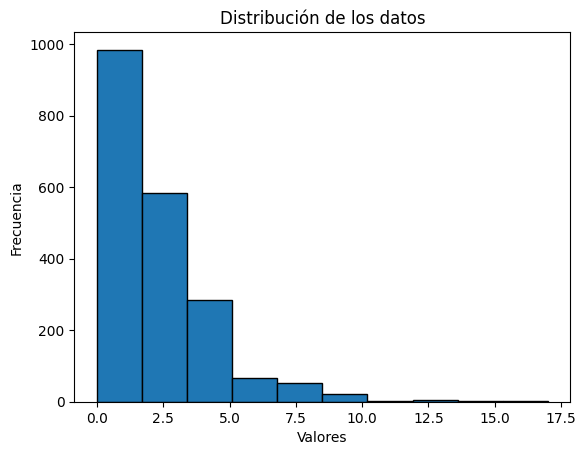


        Dinero Perdido
        Media: 263.088
        Mediana: 252.0
        Varianza: 74017.97625600001
        Desviacion: 272.0624491840063
        Minimo: 0.0
        Maximo: 2142.0
        


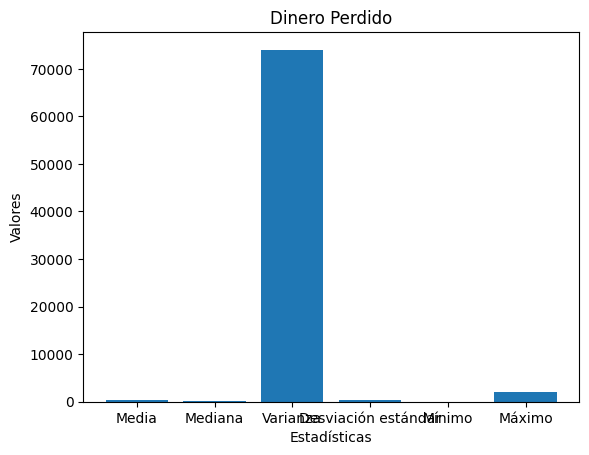

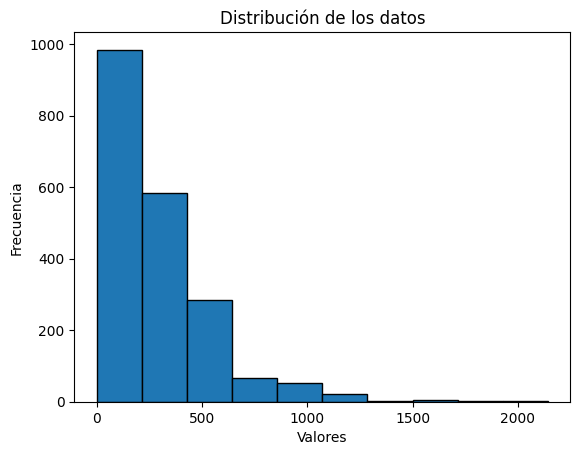

Analisis para 6 empleados

        Llamadas Perdidas
        Media: 0.69
        Mediana: 0.0
        Varianza: 1.4119000000000002
        Desviacion: 1.1882339836917644
        Minimo: 0
        Maximo: 10
        


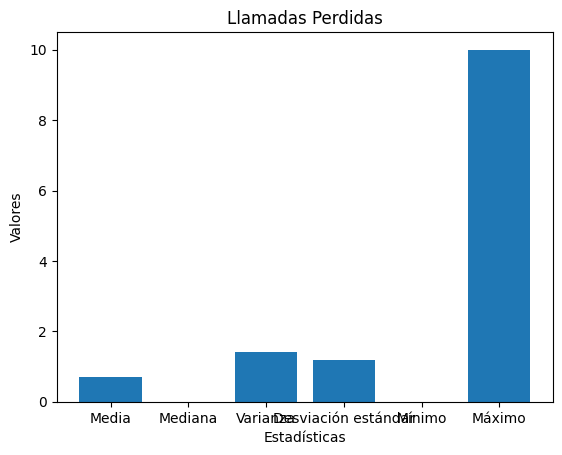

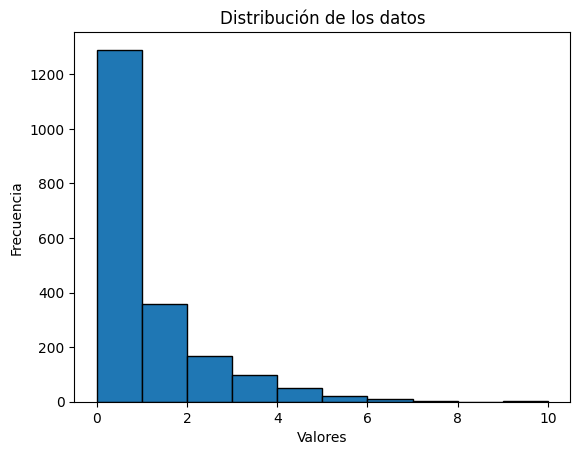


        Dinero Perdido
        Media: 86.94
        Mediana: 0.0
        Varianza: 22415.324399999994
        Desviacion: 149.7174819451623
        Minimo: 0.0
        Maximo: 1260.0
        


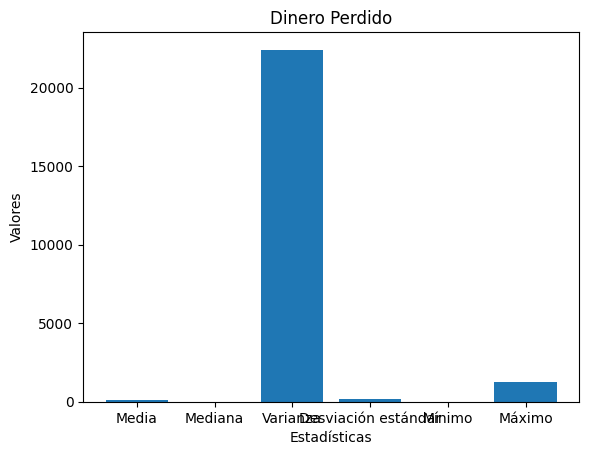

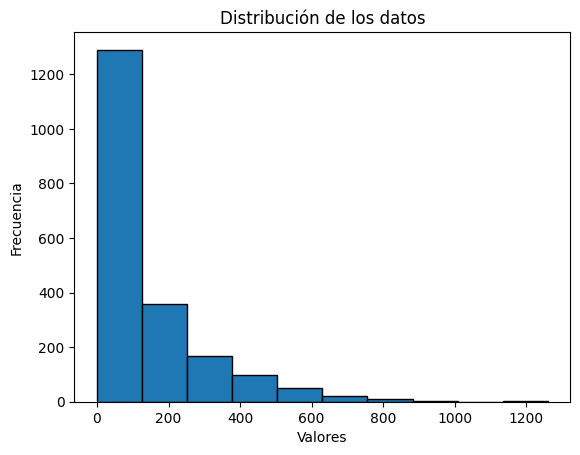

Analisis para 7 empleados

        Llamadas Perdidas
        Media: 0.181
        Mediana: 0.0
        Varianza: 0.342239
        Desviacion: 0.5850119656895917
        Minimo: 0
        Maximo: 7
        


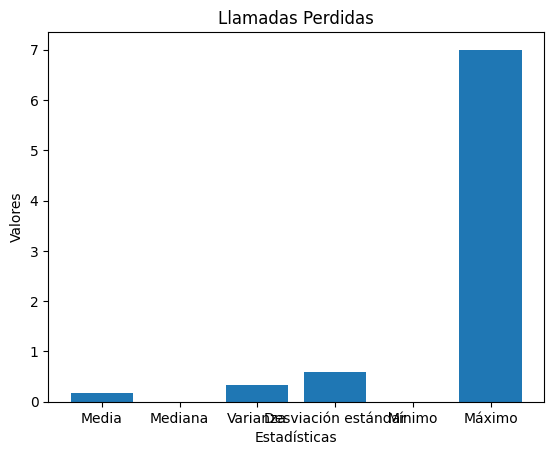

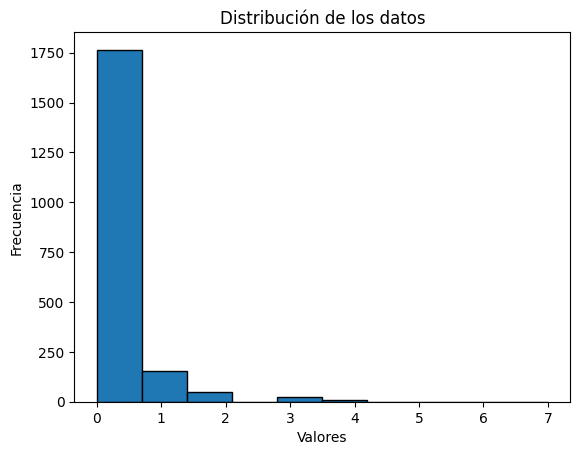


        Dinero Perdido
        Media: 22.806
        Mediana: 0.0
        Varianza: 5433.386364
        Desviacion: 73.71150767688856
        Minimo: 0.0
        Maximo: 882.0
        


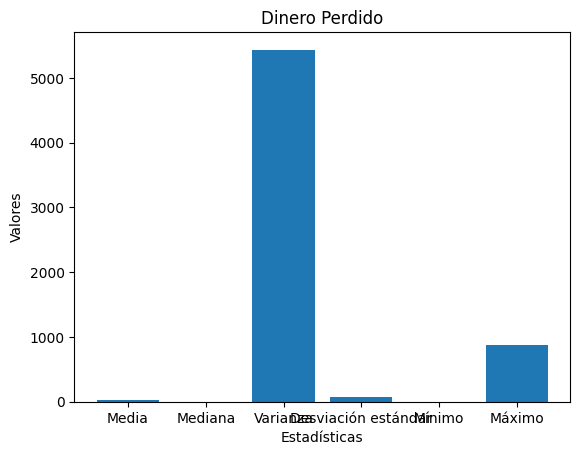

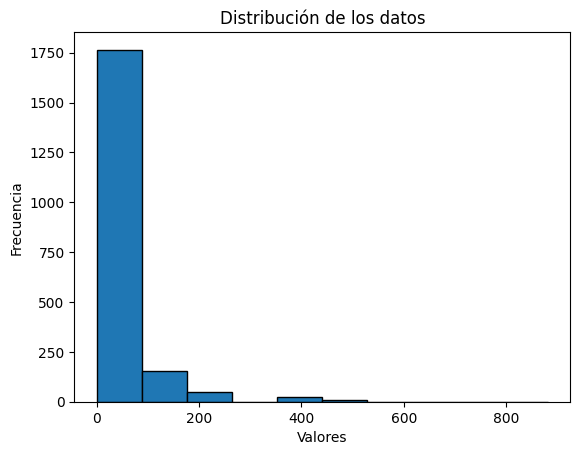

In [5]:
from utils import s_data, analysis

print("El precio de un empleado en 8h es {0}".format(8*24))
print()
for employees, data in data_w_employees:
    print(f"Analisis para {employees} empleados")
    calls, successful_calls, lost_calls, average_call_duration, max_call_duration, min_call_duration, lost_money, total_time = s_data(data)
    analysis(lost_calls,"Llamadas Perdidas",True)
    analysis(lost_money,"Dinero Perdido",True)
    


In [6]:
# formula de Erlang (M/M/C/C)
import math



def erlang(lambd, mu, c, n):
    p0 = 0
    for i in range(c+1):
        p0 += (lambd/mu)**i / math.factorial(i)
    pn = ((lambd/mu)**n / math.factorial(n)) / p0
    return pn

lambd = 1/3
mu = 1/6
r = lambd / mu

def erlang_pc(r,c):
    num= (r**c / math.factorial(c)) 
    den = ([r**i / math.factorial(i) for i in range(c+1)])
    return num / sum(den)

def erlang_L(r, Pc):
    return r *(1 - Pc)

def erlang_W(Pc, L, lambd):
    return L / (lambd * (1 - Pc))

for i in range(3,8):
    print(f"Para {i} empleados")
    pc = erlang_pc(2,i)
    l = erlang_L(2, pc)
    w = erlang_W(pc, l, lambd)
    print(f"Probabilidad del sistema lleno: {pc}")
    print(f"Número medio de clientes en el sistema: {l}")
    print(f"Tiempo medio de estancia en el sistema: {w}")


Para 3 empleados
Probabilidad del sistema lleno: 0.21052631578947367
Número medio de clientes en el sistema: 1.5789473684210527
Tiempo medio de estancia en el sistema: 6.0
Para 4 empleados
Probabilidad del sistema lleno: 0.09523809523809523
Número medio de clientes en el sistema: 1.8095238095238095
Tiempo medio de estancia en el sistema: 6.0
Para 5 empleados
Probabilidad del sistema lleno: 0.03669724770642202
Número medio de clientes en el sistema: 1.926605504587156
Tiempo medio de estancia en el sistema: 6.000000000000001
Para 6 empleados
Probabilidad del sistema lleno: 0.012084592145015107
Número medio de clientes en el sistema: 1.9758308157099698
Tiempo medio de estancia en el sistema: 6.0
Para 7 empleados
Probabilidad del sistema lleno: 0.003440860215053764
Número medio de clientes en el sistema: 1.9931182795698925
Tiempo medio de estancia en el sistema: 6.0
